In [1]:
# EDA
    
    # Missing B measurements
    # Satellite movements across sectors leads to very discontinuous data in sectors

# Feature Selection
    
    # Obtain datetime
    # Data split by satellite which took measurement
    
# Feature Engineering
    
    # Mean sampling daily
    # Filling missing values with interpolation
    # Scaling B
    # Apply timesteps to create dataset

# Model Training
    
    # LSTM

# Hyperparameter optimization

    # 1. Number of Epochs
    # 2. Batch Size
    # 3. Number of Neurons
    # 4. Dropout
    # 5. Layers
    # 6. Regularization
    # 7. Optimization Algorithm
    # 8. Loss Function
    # 9. Time Steps

In [2]:
# Load data

import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv('../data/raw/fff_Bw_1min.dat', delim_whitespace=True)
df.head()

In [9]:
#Adding column names to dataframe
df.columns = ['year', 'month', 'day', 'hour', 'minute', 
              'L', 'MLT', 'MLAT', 'AL Index', 
              'KP Index', 'Satellite Flag', 'B']

df.head()

,year,month,day,hour,minute,L,MLT,MLAT,AL Index,KP Index,Satellite Flag,B
0,2010,6,1,10,51,9.13,22.69,-1.43,-92,1,0.0,0.000765
1,2010,6,1,10,52,9.03,22.7,-1.44,-94,1,0.0,0.000699
2,2010,6,1,10,53,9.02,22.7,-1.45,-95,1,0.0,0.000786
3,2010,6,1,10,54,9.06,22.71,-1.46,-93,1,0.0,0.000748
4,2010,6,1,10,55,8.95,22.72,-1.48,-96,1,0.0,0.000933


In [10]:
# Converting year + month + day + hour + minute + second to datetime
datetime = pd.to_datetime(df[['year', 'month', 'day', 'hour', 'minute']])

# Adding datetime column to dataframe
df.insert(0, "datetime", datetime, True)

df.head()

,datetime,year,month,day,hour,minute,L,MLT,MLAT,AL Index,KP Index,Satellite Flag,B
0,2010-06-01 10:51:00,2010,6,1,10,51,9.13,22.69,-1.43,-92,1,0.0,0.000765
1,2010-06-01 10:52:00,2010,6,1,10,52,9.03,22.7,-1.44,-94,1,0.0,0.000699
2,2010-06-01 10:53:00,2010,6,1,10,53,9.02,22.7,-1.45,-95,1,0.0,0.000786
3,2010-06-01 10:54:00,2010,6,1,10,54,9.06,22.71,-1.46,-93,1,0.0,0.000748
4,2010-06-01 10:55:00,2010,6,1,10,55,8.95,22.72,-1.48,-96,1,0.0,0.000933


In [15]:
df.shape[0]

1659514

In [11]:
# Dropping useless columns
df = df.drop(['year', 'month', 'day', 'hour', 'minute', 'AL Index', 'KP Index'], axis=1)

df.head()

,datetime,L,MLT,MLAT,Satellite Flag,B
0,2010-06-01 10:51:00,9.13,22.69,-1.43,0.0,0.000765
1,2010-06-01 10:52:00,9.03,22.7,-1.44,0.0,0.000699
2,2010-06-01 10:53:00,9.02,22.7,-1.45,0.0,0.000786
3,2010-06-01 10:54:00,9.06,22.71,-1.46,0.0,0.000748
4,2010-06-01 10:55:00,8.95,22.72,-1.48,0.0,0.000933


In [12]:
# saving the dataframe 
df.to_csv('../data/processed/df_with_datetime.csv', index=False)
df = pd.read_csv('../data/processed/df_with_datetime.csv')
df.head()

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,datetime,L,MLT,MLAT,Satellite Flag,B
0,2010-06-01 10:51:00,9.13,22.69,-1.43,0.0,0.000765
1,2010-06-01 10:52:00,9.03,22.7,-1.44,0.0,0.000699
2,2010-06-01 10:53:00,9.02,22.7,-1.45,0.0,0.000786
3,2010-06-01 10:54:00,9.06,22.71,-1.46,0.0,0.000748
4,2010-06-01 10:55:00,8.95,22.72,-1.48,0.0,0.000933


In [14]:
df.shape[0]

1659514

In [16]:
# Checking if Satellite flag data is valid
df['Satellite Flag'].value_counts()

0.000000    482881
1.000000    461864
2.000000    459017
0.001010      2519
0.001040      2455
             ...  
0.201000         1
0.092600         1
0.236000         1
0.000587         1
0.097700         1
Name: Satellite Flag, Length: 2334, dtype: int64

In [17]:
# Converting satellite flag values to int
df['Satellite Flag'] = df['Satellite Flag'].astype(int)
df['Satellite Flag'].value_counts()

0    738633
1    461864
2    459017
Name: Satellite Flag, dtype: int64

In [20]:
# Splitting data into 3 frames for each satellite
# For satellite 0

df_ = df.loc[(df['Satellite Flag'] == 0)]
df_.to_csv('../data/processed/df_sat0.csv', index=False)
df_ = pd.read_csv('../data/processed/df_sat0.csv')
df_['Satellite Flag'].value_counts()

0    738633
Name: Satellite Flag, dtype: int64

In [21]:
# For satellite 1

df_ = df.loc[(df['Satellite Flag'] == 1)]
df_.to_csv('../data/processed/df_sat1.csv', index=False)
df_ = pd.read_csv('../data/processed/df_sat1.csv')
df_['Satellite Flag'].value_counts()

1    461864
Name: Satellite Flag, dtype: int64

In [22]:
# For satellite 2

df_ = df.loc[(df['Satellite Flag'] == 2)]
df_.to_csv('../data/processed/df_sat2.csv', index=False)
df_ = pd.read_csv('../data/processed/df_sat2.csv')
df_['Satellite Flag'].value_counts()

2    459017
Name: Satellite Flag, dtype: int64

In [211]:
# Select a satellite

df = pd.read_csv('../data/processed/df_sat2.csv')
df.head()

,datetime,L,MLT,MLAT,Satellite Flag,B
0,2011-03-24 19:17:00,9.79,4.60,-6.70,2,0.001070
1,2011-03-24 19:18:00,9.76,4.60,-6.72,2,0.001070
2,2011-03-24 19:19:00,9.69,4.61,-6.73,2,0.001620
3,2011-03-24 19:20:00,9.76,4.61,-6.74,2,0.001540
4,2011-03-24 19:21:00,9.63,4.62,-6.76,2,0.000988


In [212]:
df['datetime'] = pd.to_datetime(df['datetime'])
df.dtypes

datetime          datetime64[ns]
L                        float64
MLT                      float64
MLAT                     float64
Satellite Flag             int64
B                        float64
dtype: object

In [213]:
df.head()

,datetime,L,MLT,MLAT,Satellite Flag,B
0,2011-03-24 19:17:00,9.79,4.60,-6.70,2,0.001070
1,2011-03-24 19:18:00,9.76,4.60,-6.72,2,0.001070
2,2011-03-24 19:19:00,9.69,4.61,-6.73,2,0.001620
3,2011-03-24 19:20:00,9.76,4.61,-6.74,2,0.001540
4,2011-03-24 19:21:00,9.63,4.62,-6.76,2,0.000988


In [214]:
# Sort by datetime
df = df.sort_values(by = 'datetime')
df.shape

(459017, 6)

In [215]:
# Setting index on datetime
df = df.set_index('datetime')
df.head()

,L,MLT,MLAT,Satellite Flag,B
datetime,,,,,
2011-03-24 19:17:00,9.79,4.60,-6.70,2,0.001070
2011-03-24 19:18:00,9.76,4.60,-6.72,2,0.001070
2011-03-24 19:19:00,9.69,4.61,-6.73,2,0.001620
2011-03-24 19:20:00,9.76,4.61,-6.74,2,0.001540
2011-03-24 19:21:00,9.63,4.62,-6.76,2,0.000988


In [216]:
# Taking average of every day
df_sampled = df.resample('1440Min').mean()

In [217]:
df_sampled.shape

(2534, 5)

In [218]:
df_sampled.head()

,L,MLT,MLAT,Satellite Flag,B
datetime,,,,,
2011-03-24,7.158048,5.317048,-7.526571,2.0,0.001169
2011-03-25,NaN,NaN,NaN,NaN,NaN
2011-03-26,NaN,NaN,NaN,NaN,NaN
2011-03-27,7.649349,4.970414,-7.445266,2.0,0.001529
2011-03-28,7.382113,5.034588,-7.492526,2.0,0.006329


(array([733773., 734138., 734503., 734869., 735234., 735599., 735964.,
        736330., 736695.]), <a list of 9 Text xticklabel objects>)

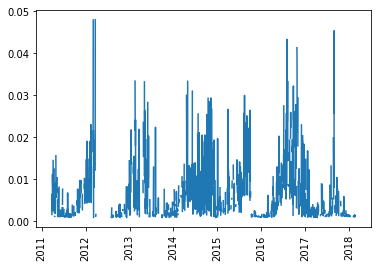

In [219]:
# Plotting to visualize extent of missing data
plt.plot(df_sampled['B'])
plt.xticks(rotation='vertical')

In [220]:
# Interpolate missing data using InterpolateSLinear
df_sampled = df_sampled.assign(InterpolateSLinear = df_sampled['B'].interpolate(method='slinear'))

(array([733773., 734138., 734503., 734869., 735234., 735599., 735964.,
        736330., 736695.]), <a list of 9 Text xticklabel objects>)

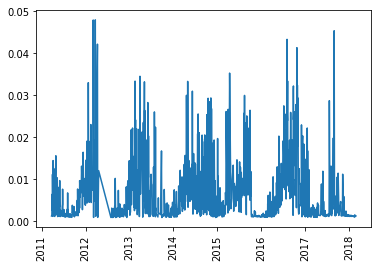

In [221]:
# Plotting to visualize with filled data
plt.plot(df_sampled['InterpolateSLinear'])
plt.xticks(rotation='vertical')

In [222]:
from sklearn.preprocessing import MinMaxScaler

# Scaling
scaler = MinMaxScaler(feature_range=(0,1))

#The reshape converts the row of values into array with several rows with 1 value each
B = scaler.fit_transform(np.array(df_sampled['InterpolateSLinear']).reshape(-1,1))

In [223]:
#Train test split
training_size = 0.7
training_row_limit = int(training_size*B.shape[0])
sections = np.split(B, indices_or_sections = [training_row_limit], axis = 0)
train = sections[0]
test = sections[1]

In [224]:
def create_dataset(dataset, time_step):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
        dataX.append(dataset[i:(i+time_step), 0])
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

In [225]:
# HyperParameters
# Timesteps is how many previous observations we are dependent on
time_step   = 100
epochs      = 100
batch_size  = 64

# Creating training and testing datasets
X_train, y_train = create_dataset(train, time_step)
X_test, ytest = create_dataset(test, time_step)

In [226]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train_reshaped = X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test_reshaped = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [227]:
X_train_reshaped.shape

(1672, 100, 1)

In [228]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [229]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(time_step,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [230]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_6 (LSTM)                (None, 100, 50)           10400     
_________________________________________________________________
lstm_7 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_8 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [231]:
model.fit(X_train_reshaped,y_train,validation_data=(X_test_reshaped,ytest),epochs=100,batch_size=64,verbose=1)

Train on 1672 samples, validate on 660 samples
Epoch 1/100
1672/1672 [==============================] - 10s 6ms/step - loss: 0.0174 - val_loss: 0.0147
Epoch 2/100
1672/1672 [==============================] - 8s 5ms/step - loss: 0.0137 - val_loss: 0.0148
Epoch 3/100
1672/1672 [==============================] - 8s 5ms/step - loss: 0.0136 - val_loss: 0.0144
Epoch 4/100
1672/1672 [==============================] - 7s 4ms/step - loss: 0.0134 - val_loss: 0.0140
Epoch 5/100
1672/1672 [==============================] - 8s 5ms/step - loss: 0.0129 - val_loss: 0.0133
Epoch 6/100
1672/1672 [==============================] - 8s 5ms/step - loss: 0.0125 - val_loss: 0.0135
Epoch 7/100
1672/1672 [==============================] - 8s 5ms/step - loss: 0.0123 - val_loss: 0.0124
Epoch 8/100
1672/1672 [==============================] - 9s 5ms/step - loss: 0.0116 - val_loss: 0.0124
Epoch 9/100
1672/1672 [==============================] - 9s 5ms/step - loss: 0.0110 - val_loss: 0.0121
Epoch 10/100
1672/1672 [=

1672/1672 [==============================] - 14s 8ms/step - loss: 0.0078 - val_loss: 0.0082
Epoch 79/100
1672/1672 [==============================] - 15s 9ms/step - loss: 0.0078 - val_loss: 0.0082
Epoch 80/100
1672/1672 [==============================] - 15s 9ms/step - loss: 0.0077 - val_loss: 0.0079
Epoch 81/100
1672/1672 [==============================] - 14s 8ms/step - loss: 0.0080 - val_loss: 0.0080
Epoch 82/100
1672/1672 [==============================] - 15s 9ms/step - loss: 0.0078 - val_loss: 0.0083
Epoch 83/100
1672/1672 [==============================] - 16s 9ms/step - loss: 0.0077 - val_loss: 0.0080
Epoch 84/100
1672/1672 [==============================] - 17s 10ms/step - loss: 0.0077 - val_loss: 0.0081
Epoch 85/100
1672/1672 [==============================] - 16s 10ms/step - loss: 0.0078 - val_loss: 0.0082
Epoch 86/100
1672/1672 [==============================] - 15s 9ms/step - loss: 0.0077 - val_loss: 0.0079
Epoch 87/100
1672/1672 [==============================] - 14s 9ms/

In [232]:
model.save('../models/Model_sat2')

In [233]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train_reshaped)
test_predict=model.predict(X_test_reshaped)

In [234]:
##Transformback to original form, reverse the effect of scaling
train_predict_unscaled = scaler.inverse_transform(train_predict)
test_predict_unscaled = scaler.inverse_transform(test_predict)
y_train_unscaled = scaler.inverse_transform(np.array(y_train).reshape(-1,1))
ytest_unscaled = scaler.inverse_transform(np.array(ytest).reshape(-1,1))

In [236]:
### Calculate RMSE performance metrics. RMSE on training data gives a benchmark to compare against.
import math
from sklearn.metrics import mean_squared_error
training_RMSE = math.sqrt(mean_squared_error(y_train_unscaled, train_predict_unscaled))
print("Training data RMSE: ", training_RMSE)

### Test Data RMSE
test_RMSE = math.sqrt(mean_squared_error(ytest_unscaled, test_predict_unscaled))
print("Testing data RMSE: ", test_RMSE)

Training data RMSE:  0.004125257169771306
Testing data RMSE:  0.004342708564961586


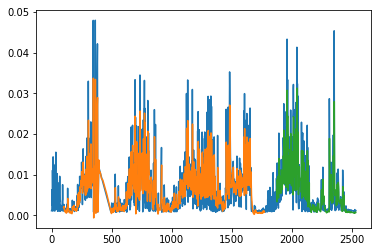

In [237]:
### Plotting 
# shift train predictions for plotting
look_back = time_step
trainPredictPlot = np.empty_like(B)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict_unscaled)+look_back, :] = train_predict_unscaled

# shift test predictions for plotting
testPredictPlot = np.empty_like(B)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict_unscaled)+(look_back*2)+1:len(B)-1, :] = test_predict_unscaled

# plot baseline and predictions
plt.plot(scaler.inverse_transform(B))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [238]:
len(test)

761

In [239]:
from numpy import array

In [240]:
future_days = 365 #Number of days we are predicting data for
prev_days=100 #Number of previous days worth of data we are utilising

In [241]:
test.shape

(761, 1)

In [242]:
# Create a list of latest 100 observations

lst = test[len(test) - prev_days -1:len(test)-1]
lst.shape

(100, 1)

In [243]:
lst = lst.reshape(lst.shape[1],lst.shape[0] , 1)
lst.shape

(1, 100, 1)

In [244]:
forecast = []

for day in range(future_days):
    print("Day : ",day)
    y = model.predict(lst)
    print("Prediction : ",y)
    forecast.append(y[0][0])
    lst = lst[:,1:100,:]
    lst = np.append(lst, [y], axis = 1)

Day :  0
Prediction :  [[-0.00111219]]
Day :  1
Prediction :  [[-0.0060573]]
Day :  2
Prediction :  [[-0.00969603]]
Day :  3
Prediction :  [[-0.01280614]]
Day :  4
Prediction :  [[-0.01588163]]
Day :  5
Prediction :  [[-0.01917986]]
Day :  6
Prediction :  [[-0.02284797]]
Day :  7
Prediction :  [[-0.02697068]]
Day :  8
Prediction :  [[-0.03159651]]
Day :  9
Prediction :  [[-0.03675611]]
Day :  10
Prediction :  [[-0.04247713]]
Day :  11
Prediction :  [[-0.04879687]]
Day :  12
Prediction :  [[-0.05577238]]
Day :  13
Prediction :  [[-0.06348825]]
Day :  14
Prediction :  [[-0.07206258]]
Day :  15
Prediction :  [[-0.08165183]]
Day :  16
Prediction :  [[-0.09245566]]
Day :  17
Prediction :  [[-0.10472357]]
Day :  18
Prediction :  [[-0.11876627]]
Day :  19
Prediction :  [[-0.13497037]]
Day :  20
Prediction :  [[-0.15382585]]
Day :  21
Prediction :  [[-0.17596576]]
Day :  22
Prediction :  [[-0.20222728]]
Day :  23
Prediction :  [[-0.23374218]]
Day :  24
Prediction :  [[-0.2720806]]
Day :  25
Pr

Prediction :  [[-3.7979884]]
Day :  213
Prediction :  [[-3.7980967]]
Day :  214
Prediction :  [[-3.7981179]]
Day :  215
Prediction :  [[-3.7980855]]
Day :  216
Prediction :  [[-3.7980807]]
Day :  217
Prediction :  [[-3.7981825]]
Day :  218
Prediction :  [[-3.7984598]]
Day :  219
Prediction :  [[-3.7988737]]
Day :  220
Prediction :  [[-3.7992861]]
Day :  221
Prediction :  [[-3.7996242]]
Day :  222
Prediction :  [[-3.7998815]]
Day :  223
Prediction :  [[-3.8000882]]
Day :  224
Prediction :  [[-3.800257]]
Day :  225
Prediction :  [[-3.8003707]]
Day :  226
Prediction :  [[-3.8004055]]
Day :  227
Prediction :  [[-3.8003466]]
Day :  228
Prediction :  [[-3.8001928]]
Day :  229
Prediction :  [[-3.7999659]]
Day :  230
Prediction :  [[-3.799693]]
Day :  231
Prediction :  [[-3.799452]]
Day :  232
Prediction :  [[-3.7993095]]
Day :  233
Prediction :  [[-3.7992475]]
Day :  234
Prediction :  [[-3.7992153]]
Day :  235
Prediction :  [[-3.7991836]]
Day :  236
Prediction :  [[-3.7991257]]
Day :  237
Pre

In [245]:
forecast_ = np.array(forecast)
forecast_.shape
forecast_ = forecast_.reshape(forecast_.shape[0],1)
forecast_.shape

(365, 1)

In [246]:
B.shape

(2534, 1)

In [247]:
new_B = np.append(B, forecast_)
new_B = new_B.reshape(new_B.shape[0], 1)
new_B.shape

(2899, 1)

In [248]:
trainPredictPlot.shape

(2534, 1)

In [249]:
testPredictPlot.shape

(2534, 1)

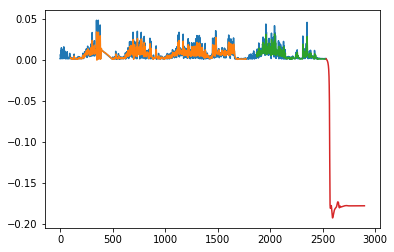

In [250]:
### Plotting 
# shift train predictions for plotting
look_back = time_step
trainPredictPlot = np.empty_like(new_B)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict_unscaled)+look_back, :] = train_predict_unscaled

# shift test predictions for plotting
testPredictPlot = np.empty_like(new_B)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict_unscaled)+(look_back*2)+1:len(B)-1, :] = test_predict_unscaled

# shift forecast for plotting
forecastPlot = np.empty_like(new_B)
forecastPlot[:, :] = np.nan
forecastPlot[len(B):len(new_B), :] = forecast_

# plot baseline and predictions and forecast
plt.plot(scaler.inverse_transform(B))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.plot(scaler.inverse_transform(forecastPlot))
plt.show()